In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df_listings = pd.read_csv('./listings.csv')

# Prepare Data

In [325]:
# Choosing data
df = df_listings[['zipcode','price','property_type','review_scores_rating', 'review_scores_location','review_scores_value']]

In [326]:
# Missing data
df = df.dropna(axis=0, how='any')
df = df[df['zipcode'] !='99\n98122']

In [327]:
# Remove dollar sign
df['price'] = df['price'].apply(lambda x : x.replace('$', ''))
df['price'] = df['price'].apply(lambda x : x.replace(',', ''))
df['price'] = pd.to_numeric(df['price'])

# Analyze, Model, and Visualize

Text(0.5, 1.0, 'Scores Based on Zipcode')

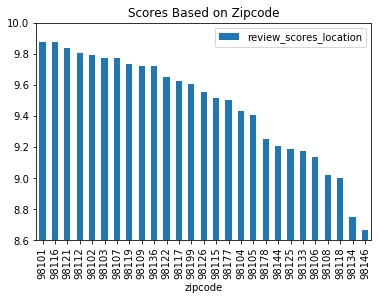

In [328]:
# 1.Location
mean_score_location = pd.DataFrame(df.groupby('zipcode')['review_scores_location'].mean().sort_values(ascending = False))
mean_score_location.plot(kind = 'bar')
plt.ylim(8.6, 10)
plt.title('Scores Based on Zipcode')

In [329]:
# 2.Price
df['price_bin'] = pd.cut(df['price'], 10)
mean_score_price = pd.DataFrame(df.groupby('price_bin')['review_scores_value'].mean().sort_values(ascending=False))
mean_score_price

,review_scores_value
price_bin,
"(805.0, 902.5]",10.000000
"(902.5, 1000.0]",9.750000
"(415.0, 512.5]",9.538462
"(512.5, 610.0]",9.500000
"(24.025, 122.5]",9.486996
"(317.5, 415.0]",9.454545
"(122.5, 220.0]",9.392045
"(220.0, 317.5]",9.375635
"(707.5, 805.0]",9.250000


Text(0.5, 1.0, 'Scores Based on Property_type')

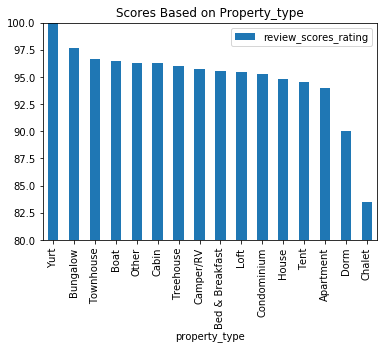

In [330]:
# 3.Property_type
mean_score_type = pd.DataFrame(df.groupby('property_type')['review_scores_rating'].mean().sort_values(ascending=False))
mean_score_type.plot(kind = 'bar')
plt.ylim(80, 100)
plt.title('Scores Based on Property_type')

In [331]:
type_count = pd.DataFrame(df.groupby('property_type')['property_type'].count().sort_values(ascending=False))
type_count

,property_type
property_type,
House,1451
Apartment,1424
Townhouse,80
Condominium,68
Loft,33
Bed & Breakfast,25
Cabin,21
Other,19
Camper/RV,10
